In [1]:
from fmpy import *

In [2]:
filename = 'SimpleCooling.fmu'

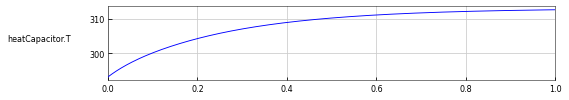

In [9]:
result = simulate_fmu(filename, start_values={'thermalConductance.k': 1}, output=['heatCapacitor.T'])
plot_result(result)

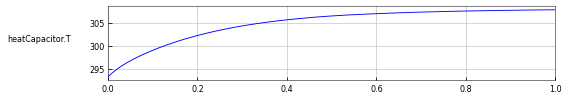

In [7]:
result = simulate_fmu(filename, start_values={'thermalConductance.k': 2}, output=['heatCapacitor.T'])
plot_result(result)